In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# F&B Revenue Forecast Model

## Data

In [2]:
#Loading the raw data

df_2016 = pd.read_csv("raw_data/orders2016.csv", sep=";")
df_2017 = pd.read_csv("raw_data/orders2017.csv", sep=";")
df_2018 = pd.read_csv("raw_data/orders2018.csv", sep=";")
df_2019 = pd.read_csv("raw_data/orders2019.csv", sep=";")
df_2020 = pd.read_csv("raw_data/orders2020.csv", sep=";")
df_2021 = pd.read_csv("raw_data/orders2021.csv", sep=";")
df_2022 = pd.read_csv("raw_data/orders2022.csv", sep=";")

df_list = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

In [3]:
df_2018.head()

,id,date,time,quantity,item_id,item_name,item_plu,item_price,expense_item,cancelled,...,device_name,device_number,device_id,table_name,table_id,tab_name,tab_id,party_name,party_number,party_id
0,689E8A27-629F-43C4-B458-251F245F5A8E,2018-04-22,14:01:47,1,6742FD21-98EF-4543-AD03-D615DD32741F,Waffle + A WHITE CHOCO,0,740,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,000008A2-13BE-40B3-A1A6-9C054D4FF5B9,Partei 1,0,825E8016-9802-4A69-A25B-3F95C27D1280
1,05AB42CE-0ED7-423A-A241-C7D0D412B082,2018-04-21,15:21:28,1,A1A8AB5A-AE65-4EB6-B52E-71813E7C97DF,C Classic CHOCOLATE,0,390,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0002678D-1635-4CCC-B2EF-3536C931EA23,Partei 1,0,28D2D25E-E573-476B-8A0D-A15A5C6BBEFC
2,D889B52F-B5BC-4DBE-BA15-38DF81465708,2018-05-05,16:35:49,1,54710C6E-662B-45FE-8874-1EBD27BC5CBF,A Classic VANILLA,0,440,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB
3,BDA43D01-74EA-48A4-BD5C-C4D6CDDB679C,2018-05-05,16:35:49,1,ED12F302-549B-436D-A19A-A60D74D46F5F,B Classic CHOCOLATE,0,440,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB
4,3736E95B-CC65-4B9A-BC0C-ADFFA9D18950,2018-05-05,16:35:49,1,F2162A86-15D4-49CC-943E-9071CC7BC786,D Classic RASPBERRY,0,390,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB


In [4]:
#Dropping unnecessary columns, grouping by "date", summing "item_price" to get daily revenues

for i, df in enumerate(df_list):
    df_list[i] = pd.DataFrame(df.groupby(by="date")["item_price"].sum()/100)

In [5]:
#Concat all data in one dataframe, rename the columns for prophet

df = pd.concat(df_list, ignore_index=False)
df = df.rename(columns={"date": "ds", "item_price": "y"})
df["ds"] = df.index
df = df.reset_index(drop=True)
df = df[["ds","y"]]
df

,ds,y
0,2016-09-01,365.9
1,2016-09-02,358.6
2,2016-09-03,487.5
3,2016-09-04,90.9
4,2016-09-05,125.0
...,...,...
1729,2022-11-18,78.5
1730,2022-11-19,287.3
1731,2022-11-20,125.8
1732,2022-11-21,1.5


In [6]:
df.describe()

,y
count,1734.000000
mean,671.720704
std,452.051893
min,1.500000
25%,329.575000
50%,573.100000
75%,927.025000
max,2832.900000


<Axes: xlabel='y', ylabel='Count'>

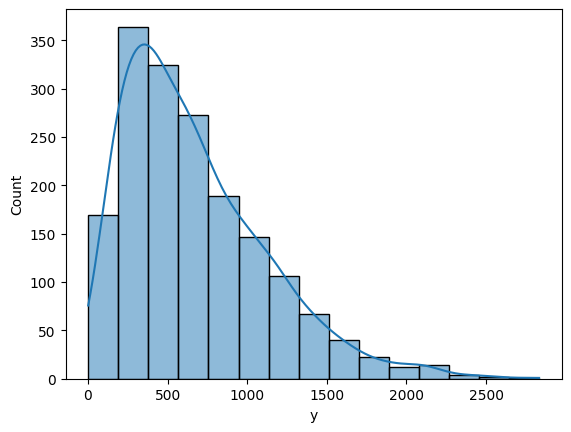

In [7]:
sns.histplot(data=df["y"],kde=True,bins=15)

In [ ]:
#sns.scatterplot(x=df["ds"],y=df["y"])

# Feature Processing

## Berlin Covid Lockdown Features

In [ ]:
'''March 22, 2020
 -Full Lockdown
April 22,2020
 -Partial Lockdown
May 4, 2020
-Lockdown ended
October 10, 2020
 -Partial Lockdown
December 16, 2020
-Hard lockdown
January 10, 2021
 -Lockdown ended
March 31, 2021
 -Partial Lockdown
May 19, 2021
 -Lockdown ended
November 2, 2021
 -Partial Lockdown
December 10, 2021
 -Lockdown ended'''

In [8]:
#checking original date data type
df['ds'].dtype

dtype('O')

In [9]:
#changing date data type
df['ds']=pd.to_datetime(df['ds'])

In [10]:
#verifying date data type
df['ds'].dtype

dtype('<M8[ns]')

In [11]:
#verifying date data type / format
df['ds'][0]

Timestamp('2016-09-01 00:00:00')

In [12]:
#verifying capatiablilty of to_datetime funciton
pd.to_datetime('2020-03-22')

Timestamp('2020-03-22 00:00:00')

In [13]:
# only first slice appears to work!!
Hard = df[((df['ds'] >= pd.to_datetime("2020-03-22")) & (df['ds'] <= pd.to_datetime("2020-04-21"))) | ((df['ds'] >= pd.to_datetime("2020-12-16")) & (df['ds'] <= pd.to_datetime("2021-01-09"))) ]
Hard

,ds,y
973,2020-03-22,467.9
974,2020-03-23,43.6
975,2020-03-24,43.6
976,2020-03-26,198.2
977,2020-03-27,237.2
978,2020-03-28,405.6
979,2020-04-01,158.4
980,2020-04-02,96.6
981,2020-04-03,107.9
982,2020-04-04,618.0


In [14]:
#verifying separately
Hard_a = df[(df['ds'] >= pd.to_datetime("2020-03-22")) & (df['ds'] <= pd.to_datetime("2020-04-21"))]
Hard_a

,ds,y
973,2020-03-22,467.9
974,2020-03-23,43.6
975,2020-03-24,43.6
976,2020-03-26,198.2
977,2020-03-27,237.2
978,2020-03-28,405.6
979,2020-04-01,158.4
980,2020-04-02,96.6
981,2020-04-03,107.9
982,2020-04-04,618.0


In [15]:
#verifying separately
Hard_b = df[(df['ds'] >= pd.to_datetime("2020-12-16")) & (df['ds'] <= pd.to_datetime("2021-01-09"))]
Hard_b

,ds,y


In [16]:
#checking for True values
(df['ds'] >= pd.to_datetime("2020-12-16")) & (df['ds'] <= pd.to_datetime("2021-01-09"))

0       False
1       False
2       False
3       False
4       False
        ...  
1729    False
1730    False
1731    False
1732    False
1733    False
Name: ds, Length: 1734, dtype: bool

In [17]:
#checking for True values. No data points in original data frame shop closed!
((df['ds'] >= pd.to_datetime("2020-12-16")) & (df['ds'] <= pd.to_datetime("2021-01-09"))).value_counts()


False    1734
Name: ds, dtype: int64

In [18]:
#adding new column based on originally tried conjoined method
df['H/F Cov Lock'] = ((df['ds'] >= pd.to_datetime("2020-03-22")) & (df['ds'] <= pd.to_datetime("2020-04-21"))) | ((df['ds'] >= pd.to_datetime("2020-12-16")) & (df['ds'] <= pd.to_datetime("2021-01-09")))
df.head()

,ds,y,H/F Cov Lock
0,2016-09-01,365.9,False
1,2016-09-02,358.6,False
2,2016-09-03,487.5,False
3,2016-09-04,90.9,False
4,2016-09-05,125.0,False


In [19]:
#verifying true counts
df["H/F Cov Lock"].value_counts()

False    1707
True       27
Name: H/F Cov Lock, dtype: int64

In [20]:
#verifying transformation of True to 1 values
df['H/F Cov Lock'] = df['H/F Cov Lock'].astype(int)
df["H/F Cov Lock"].value_counts()

0    1707
1      27
Name: H/F Cov Lock, dtype: int64

In [21]:
#Same method used to identify Partial Lockdown dates and create them as a new column
df['Part Cov Lock'] = ((df['ds'] >= pd.to_datetime("2020-04-22")) & (df['ds'] <= pd.to_datetime("2020-05-03"))) | ((df['ds'] >= pd.to_datetime("2020-10-10")) & (df['ds'] <= pd.to_datetime("2020-12-15"))) | ((df['ds'] >= pd.to_datetime("2021-03-31")) & (df['ds'] <= pd.to_datetime("2021-05-18"))) | ((df['ds'] >= pd.to_datetime("2021-11-02")) & (df['ds'] <= pd.to_datetime("2021-12-09")))
df['Part Cov Lock'].value_counts()

False    1622
True      112
Name: Part Cov Lock, dtype: int64

In [22]:
#transforming True to 1
df['Part Cov Lock'] = df['Part Cov Lock'].astype(int)
df['Part Cov Lock'].value_counts()

0    1622
1     112
Name: Part Cov Lock, dtype: int64

In [23]:
#df check
df.head()

,ds,y,H/F Cov Lock,Part Cov Lock
0,2016-09-01,365.9,0,0
1,2016-09-02,358.6,0,0
2,2016-09-03,487.5,0,0
3,2016-09-04,90.9,0,0
4,2016-09-05,125.0,0,0


In [24]:
#covid lockdown regulations in Berlin as a joint feature - regardless of severity
df['cov_lock'] = ((df['ds'] >= pd.to_datetime("2020-03-22")) & (df['ds'] <= pd.to_datetime("2020-04-21"))) | ((df['ds'] >= pd.to_datetime("2020-12-16")) & (df['ds'] <= pd.to_datetime("2021-01-09"))) | ((df['ds'] >= pd.to_datetime("2020-04-22")) & (df['ds'] <= pd.to_datetime("2020-05-03"))) | ((df['ds'] >= pd.to_datetime("2020-10-10")) & (df['ds'] <= pd.to_datetime("2020-12-15"))) | ((df['ds'] >= pd.to_datetime("2021-03-31")) & (df['ds'] <= pd.to_datetime("2021-05-18"))) | ((df['ds'] >= pd.to_datetime("2021-11-02")) & (df['ds'] <= pd.to_datetime("2021-12-09")))
df['cov_lock'] = df['cov_lock'].astype(int)
df['cov_lock'].value_counts()

0    1595
1     139
Name: cov_lock, dtype: int64

In [25]:
#df check
df.head()

,ds,y,H/F Cov Lock,Part Cov Lock,cov_lock
0,2016-09-01,365.9,0,0,0
1,2016-09-02,358.6,0,0,0
2,2016-09-03,487.5,0,0,0
3,2016-09-04,90.9,0,0,0
4,2016-09-05,125.0,0,0,0


## Berlin Mitte and Mitte Mittem Unemployment rates

In [26]:
#download Berlin unemployment cv
df_unemp_ber= pd.read_csv("raw_data/BerlinUnemployment2016-2022.csv", sep=";")
df_unemp_ber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      84 non-null     object
 1   unemp_Berlin_Mitte        84 non-null     object
 2   unemp_Berlin_Mitte_Mitte  84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [27]:
#change date to datetime data type
df_unemp_ber['Date'] = pd.to_datetime(df_unemp_ber['Date'], format='%d/%m/%Y')
df_unemp_ber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      84 non-null     datetime64[ns]
 1   unemp_Berlin_Mitte        84 non-null     object        
 2   unemp_Berlin_Mitte_Mitte  84 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ KB


In [28]:
#replace "," with "." in object columns
df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']] = df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']].apply(lambda x: x.str.replace(',', '.'))
df_unemp_ber.head()

,Date,unemp_Berlin_Mitte,unemp_Berlin_Mitte_Mitte
0,2016-01-31,10.8,12
1,2016-02-29,10.7,11.7
2,2016-03-31,11.4,11.4
3,2016-04-30,10.1,11.1
4,2016-05-31,9.5,10.3


In [29]:
#changed objects to floats
df_unemp_ber = df_unemp_ber.astype({"unemp_Berlin_Mitte": float, "unemp_Berlin_Mitte_Mitte": float})
df_unemp_ber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      84 non-null     datetime64[ns]
 1   unemp_Berlin_Mitte        84 non-null     float64       
 2   unemp_Berlin_Mitte_Mitte  84 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 KB


In [30]:
# turning percentage into decimal form
df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']] = df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']]/100 
df_unemp_ber.head()

,Date,unemp_Berlin_Mitte,unemp_Berlin_Mitte_Mitte
0,2016-01-31,0.108,0.120
1,2016-02-29,0.107,0.117
2,2016-03-31,0.114,0.114
3,2016-04-30,0.101,0.111
4,2016-05-31,0.095,0.103


In [31]:
#prepping for day value fill
df_unemp_ber.set_index('Date', inplace=True)
df_unemp_ber.head()

,unemp_Berlin_Mitte,unemp_Berlin_Mitte_Mitte
Date,,
2016-01-31,0.108,0.120
2016-02-29,0.107,0.117
2016-03-31,0.114,0.114
2016-04-30,0.101,0.111
2016-05-31,0.095,0.103


In [32]:
#forward fill of days
df_unemp_ber = df_unemp_ber.resample('D').ffill()
df_unemp_ber

,unemp_Berlin_Mitte,unemp_Berlin_Mitte_Mitte
Date,,
2016-01-31,0.108,0.120
2016-02-01,0.108,0.120
2016-02-02,0.108,0.120
2016-02-03,0.108,0.120
2016-02-04,0.108,0.120
...,...,...
2022-11-27,0.089,0.087
2022-11-28,0.089,0.087
2022-11-29,0.089,0.087


In [33]:
#merged datafames
merged_df = pd.merge(df, df_unemp_ber, how='left', left_on='ds', right_on='Date')
merged_df.head()

,ds,y,H/F Cov Lock,Part Cov Lock,cov_lock,unemp_Berlin_Mitte,unemp_Berlin_Mitte_Mitte
0,2016-09-01,365.9,0,0,0,0.095,0.103
1,2016-09-02,358.6,0,0,0,0.095,0.103
2,2016-09-03,487.5,0,0,0,0.095,0.103
3,2016-09-04,90.9,0,0,0,0.095,0.103
4,2016-09-05,125.0,0,0,0,0.095,0.103


## Foottraffic Data

Originally only available 2021-2023

In [ ]:
#loading data
foottraffic_2021 = pd.read_csv("raw_data/foottraffic2021.csv", sep=";")
foottraffic_2022 = pd.read_csv("raw_data/foottraffic2022.csv", sep=";")
foottraffic_2023 = pd.read_csv("raw_data/foottraffic2023.csv", sep=";")

foottraffic_list = [foottraffic_2021, foottraffic_2022, foottraffic_2023]

In [ ]:
foottraffic_2021.head()

In [ ]:
#Concat all data in one dataframe, rename the columns for prophet

foottraffic_df = pd.concat(foottraffic_list, ignore_index=False)
foottraffic_df = foottraffic_df.rename(columns={"time of measurement": "ds", "pedestrians count": "pedestrians"})
foottraffic_df = foottraffic_df[["ds","pedestrians"]]
foottraffic_df

In [ ]:
foottraffic_df.info()

In [ ]:
#transform to datetime format part 1
foottraffic_df['ds'] = pd.to_datetime(foottraffic_df['ds'], utc=True)

In [ ]:
foottraffic_df.info()

In [ ]:
#transform to datetime format part 2
foottraffic_df['ds'] = foottraffic_df['ds'].dt.date
foottraffic_df.info()

In [ ]:
#transform to datetime format part 3
foottraffic_df['ds'] = pd.to_datetime(foottraffic_df['ds'])
foottraffic_df.info()

In [ ]:
#check
foottraffic_df["pedestrians"].value_counts()

In [ ]:
#merged datafames
merged_df = pd.merge(merged_df, foottraffic_df, how='left', left_on='ds', right_on='ds')
merged_df.head()